# 📘 Regresión Lineal Múltiple - Predicción de MatchKills

Usando múltiples variables como predictores.

## 1. Importar Librerías

In [43]:
# Librerías generales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree

## 2. Carga del Dataset

In [40]:
from google.colab import drive
drive.mount('/content/drive')

dt = '/content/drive/MyDrive/Copia de Anexo ET_demo_round_traces_2022.csv'
# Cargar los datos
try:
    data = pd.read_csv(dt, sep=";", encoding='latin-1', low_memory=False)
    print("Datos cargados exitosamente!")
except Exception as e:
    print(f"Error al cargar los datos: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Datos cargados exitosamente!


## 3. Análisis Exploratorio de Datos (EDA)

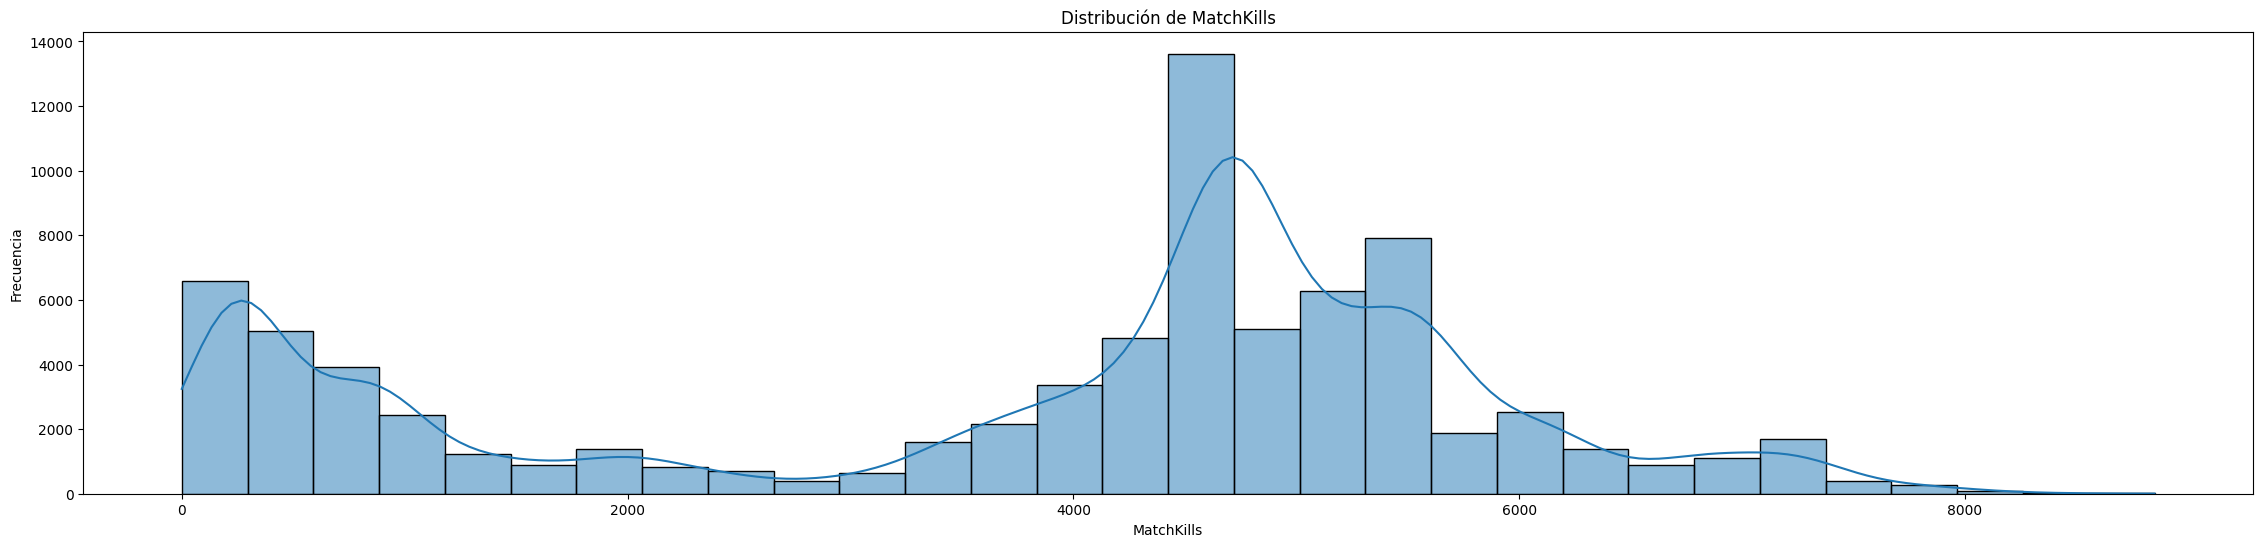

In [65]:
plt.figure(figsize=(28, 6))
sns.histplot(data['RoundStartingEquipmentValue'], bins=30, kde=True)
plt.title('Distribución de MatchKills')
plt.xlabel('MatchKills')
plt.ylabel('Frecuencia')
plt.show()

## 4. Preparación de Datos para el Modelo

In [68]:
variables = ['TimeAlive', 'MatchAssists', 'MatchHeadshots', 'TeamStartingEquipmentValue']
# Use 'data' instead of 'df' to access the DataFrame loaded from the CSV
df_modelo = data[variables + ['MatchKills']].dropna()

X = df_modelo[variables]
y = df_modelo['MatchKills']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Crear el modelo
reg_tree = DecisionTreeRegressor(random_state=42)

# Entrenar el modelo
# This should now work as the data should be in a numeric format
reg_tree.fit(X_train, y_train)

print("Modelo entrenado exitosamente!")

In [ ]:
# predict
Y_pred = reg_tree.predict(X_test)

# Calcular las metricas
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

print(f'RMSE: {rmse:.2f}')
print(f'R²: {r2:.2f}')


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error # Import mean_absolute_error

# print the metrics
print("R²:", r2_score(y_test, Y_pred)) # Use Y_pred instead of y_pred
print("MAE:", mean_absolute_error(y_test, Y_pred)) # Use Y_pred instead of y_pred
print("RMSE:", mean_squared_error(y_test, Y_pred, squared=False)) # Use Y_pred instead of y_pred